In [1]:
# EDA Packages
import pandas as pd
import numpy as np
import random
import seaborn as sns
# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [36]:
# Load Url Data 
urls_data = pd.read_csv("urldata.csv")

In [3]:
type(urls_data)

pandas.core.frame.DataFrame

In [4]:
urls_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [5]:
urls_data.shape

(420464, 2)

In [6]:
urls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420464 entries, 0 to 420463
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     420464 non-null  object
 1   label   420464 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


In [7]:
urls_data.count()

url      420464
label    420464
dtype: int64

In [8]:
urls_data.describe()

,url,label
count,420464,420464
unique,411247,2
top,d11m2p9mpffp32.cloudfront.net/main/web_zt.exe,good
freq,27,344821


In [9]:
urls_data['label'].unique()

array(['bad', 'good'], dtype=object)

<AxesSubplot:ylabel='label'>

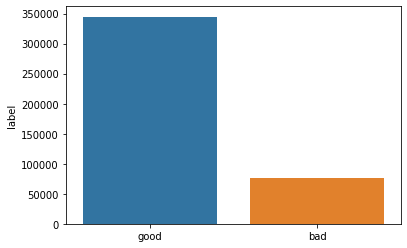

In [10]:
sns.barplot(x = ['good', 'bad'], y = urls_data['label'].value_counts())

In [11]:
# Calculating the number of bad URLs per good URLs
good_urls = urls_data['label'].where(urls_data['label'] == 'good').count()
bad_urls = urls_data['label'].where(urls_data['label'] == 'bad').count()
print('Good URLs: ', good_urls)
print('Bad URLs: ', bad_urls)
print(f'On average there are {bad_urls/good_urls} bad urls per good url')

Good URLs:  344821
Bad URLs:  75643
On average there are 0.21936888994579795 bad urls per good url


In [12]:
# Labels
y = urls_data["label"]

In [13]:
url_list = urls_data["url"]

In [14]:
# Using Default Tokenizer
vectorizer = TfidfVectorizer()

In [15]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)	

In [17]:
# Model Building
#using logistic regression
logit = LogisticRegression(solver='lbfgs', max_iter=600)	
logit.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [18]:
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9641825122186151


In [ ]:
X_predict = ["google.com/search=wikipedia",
"google.com/search=faizanahmad",
"pakistanifacebookforever.com/getpassword.php/", 
"radsport-voggel.de/wp-admin/includes/log.exe", 
"ahrenhei.without-transfer.ru/nethost.exe ",
"itidea.it/centroesteticosothys/img/_notes/gum.exe"]

In [ ]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [ ]:
print(New_predict)

In [ ]:
X_predict1 = ["www.buyfakebillsonlinee.blogspot.com", 
"unitedairlineslogistics.com",
"google.com",
"hosts-file.net" ]

In [ ]:
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = logit.predict(X_predict1)
print(New_predict1)

In [ ]:
# Using Default Tokenizer
vectorizer = TfidfVectorizer()

In [ ]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)	

In [ ]:
# Model Building
logit = LogisticRegression(solver='lbfgs', max_iter=600)	#using logistic regression
logit.fit(X_train, y_train)

In [ ]:
# Accuracy of Our Model with our Custom Token
print("Accuracy ",logit.score(X_test, y_test))

In [ ]:
arr = ['bopsecrets.org/rexroth/cr/1.htm']
arr = vectorizer.transform(arr)
print(logit.predict(arr))

# Testing on second dataset

In [20]:
data = pd.read_csv("phishing_site_urls.csv")

In [21]:
data.head(10)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
5,smilesvoegol.servebbs.org/voegol.php,bad
6,premierpaymentprocessing.com/includes/boleto-2...,bad
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,bad
8,super1000.info/docs,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,bad


In [42]:
data['URL'].shape

(549346,)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [44]:
data.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [45]:
data['Label'].value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

<AxesSubplot:ylabel='Label'>

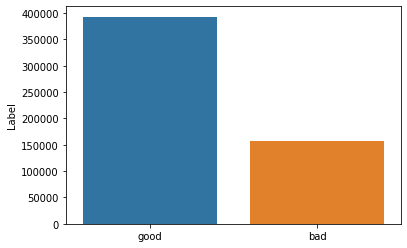

In [47]:
sns.barplot(x = ['good', 'bad'], y = data['Label'].value_counts())

In [22]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,URL,Label
0,dleinc.com/gallery1.htm,good
1,cloudhostcontrol.com/write/dropbox,bad
2,paypal.fr.generalwhite.com/fr/,bad
3,sherlock.uvishere.com/2ujlndd,bad
4,zebrafinch.com/VCP.html,good
5,kardraf.org/JlmUJYTnhJ75nSDGMo/webscrprim.php?...,bad
6,www.gamepro.com/microsoft/xbox/games/reviews/2...,good
7,yelp.com/biz/super-bear-supermarket-juneau,good
8,osu.edu/map/google.php,good
9,forums.delphiforums.com/spamwarehouse/,good


In [23]:
X = vectorizer.fit_transform(data['URL'])
y = data['Label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)

In [25]:
logit.fit(X_train,y_train)
#predicting the target value from the model for the samples
model_score=logit.score(X_test, y_test)
model_score

0.9571220533357604

In [34]:
arr = ['google.com']

In [35]:
arr = vectorizer.transform(arr)
print(logit.predict(arr))

['good']
